In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 30, 30, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 16, 16, 32)        0         
 ing2D)                                                          
                                                        

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 103s 501ms/step - loss: 0.6890 - accuracy: 0.7515 - val_loss: 0.4717 - val_accuracy: 0.8363
Epoch 2/5
200/200 [==============================] - 97s 488ms/step - loss: 0.4232 - accuracy: 0.8489 - val_loss: 0.3955 - val_accuracy: 0.8587
Epoch 3/5
200/200 [==============================] - 96s 479ms/step - loss: 0.3704 - accuracy: 0.8688 - val_loss: 0.3484 - val_accuracy: 0.8829
Epoch 4/5
200/200 [==============================] - 96s 483ms/step - loss: 0.3400 - accuracy: 0.8783 - val_loss: 0.3244 - val_accuracy: 0.8877
Epoch 5/5
200/200 [==============================] - 94s 468ms/step - loss: 0.3199 - accuracy: 0.8852 - val_loss: 0.3041 - val_accuracy: 0.8928


<Axes: >

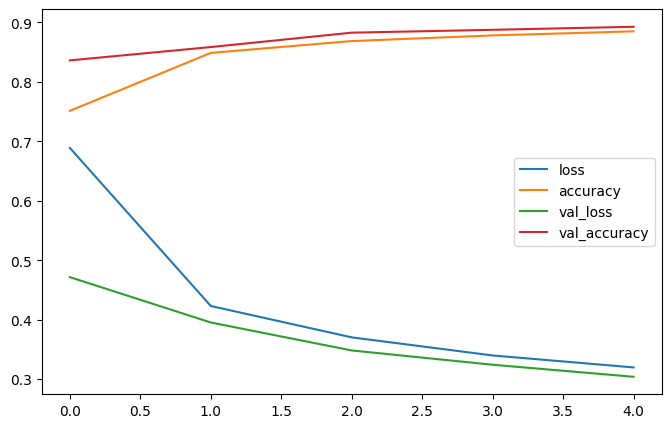

In [15]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [16]:
history.history

{'loss': [0.6889839172363281,
  0.42317789793014526,
  0.3704424500465393,
  0.34000205993652344,
  0.3198961019515991],
 'accuracy': [0.7514500021934509,
  0.8489000201225281,
  0.8687833547592163,
  0.8782666921615601,
  0.8851500153541565],
 'val_loss': [0.4717276990413666,
  0.3954515755176544,
  0.3484211564064026,
  0.3244030177593231,
  0.30414265394210815],
 'val_accuracy': [0.8363000154495239,
  0.8586999773979187,
  0.8828999996185303,
  0.8877000212669373,
  0.892799973487854]}

In [17]:
model.save('masoud.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# MasoudKaviani.ir

***

# Visualizing Neural Network Layers

In [19]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.7 MB/s eta 0:00:00


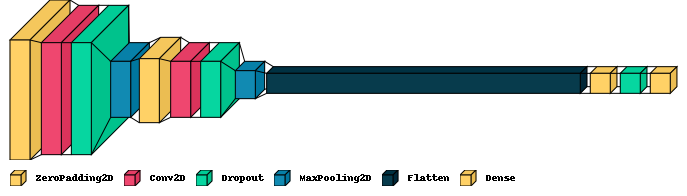

In [21]:
import visualkeras

visualkeras.layered_view(model, legend=True)

In [ ]:
def feature_map_visualization(activation, save=True):
  import matplotlib.pyplot as plt

  # Assuming 'activations' from previous cells contains the layer activations.
  for layer_idx, layer_activation in enumerate(activations):
    print(f"Activations for layer {model.layers[layer_idx].name}: Shape = {layer_activation.shape}")

    # Handle cases where activations are not feature maps (e.g., Dense layers) --> Just for a better vision.
    if len(layer_activation.shape) == 2:
      plt.imshow(layer_activation, aspect='auto', cmap='viridis')
      plt.colorbar()
      plt.title(f"Layer {model.layers[layer_idx].name} Activations")
      plt.show()

    # Handle feature maps (4D activations).
    elif len(layer_activation.shape) == 4:
      num_feature_maps = layer_activation.shape[-1]
      num_cols = int(np.ceil(np.sqrt(num_feature_maps)))
      num_rows = int(np.ceil(num_feature_maps / num_cols))

      fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))  # Adjust figsize as needed.
      fig.suptitle(f"Feature Maps for Layer {model.layers[layer_idx].name}", fontsize=16)

      # Handle single subplot case.
      if num_feature_maps == 1:
          axes.imshow(layer_activation[0, :, :,0], cmap='viridis')
          axes.set_title(f"Feature Map 1")
          axes.axis('off')
      else:
          for i in range(num_feature_maps):
              ax = axes.flatten()[i]  # Get the i-th subplot.
              ax.imshow(layer_activation[0, :, :, i], cmap='viridis')
              ax.set_title(f"Feature Map {i+1}")
              ax.axis('off')

          # Remove any unused subplots.
          for i in range(num_feature_maps, num_rows * num_cols):
              fig.delaxes(axes.flatten()[i])

      plt.tight_layout()

      # Save figs.
      if save:
        plt.savefig(f'feature_maps/{model.layers[layer_idx].name}.png', bbox_inches='tight')
        plt.show()
      else:
        plt.show()

    else:
      print(f"Skipping layer {model.layers[layer_idx].name} as it has an unsupported shape.")

In [ ]:
os.makedirs('feature_maps', exist_ok=True)

for layer_name, layer_activation in zip([layer.name for layer in model.layers], activations):
    np.save(f'feature_maps/{layer_name}.npy', layer_activation)

In [ ]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
example_image = np.random.randint(0, X_test.shape[0])

activations = activation_model.predict(X_test[example_image:example_image+1])

print(f"Predicted Class: {np.argmax(activations[-1].flatten())}")
print(f"Actual Class: {y_test[example_image]}")

1/1 [==============================] - 0s 93ms/step
Predicted Class: 5
Actual Class: 5


Activations for layer zero_padding2d: Shape = (1, 30, 30, 1)


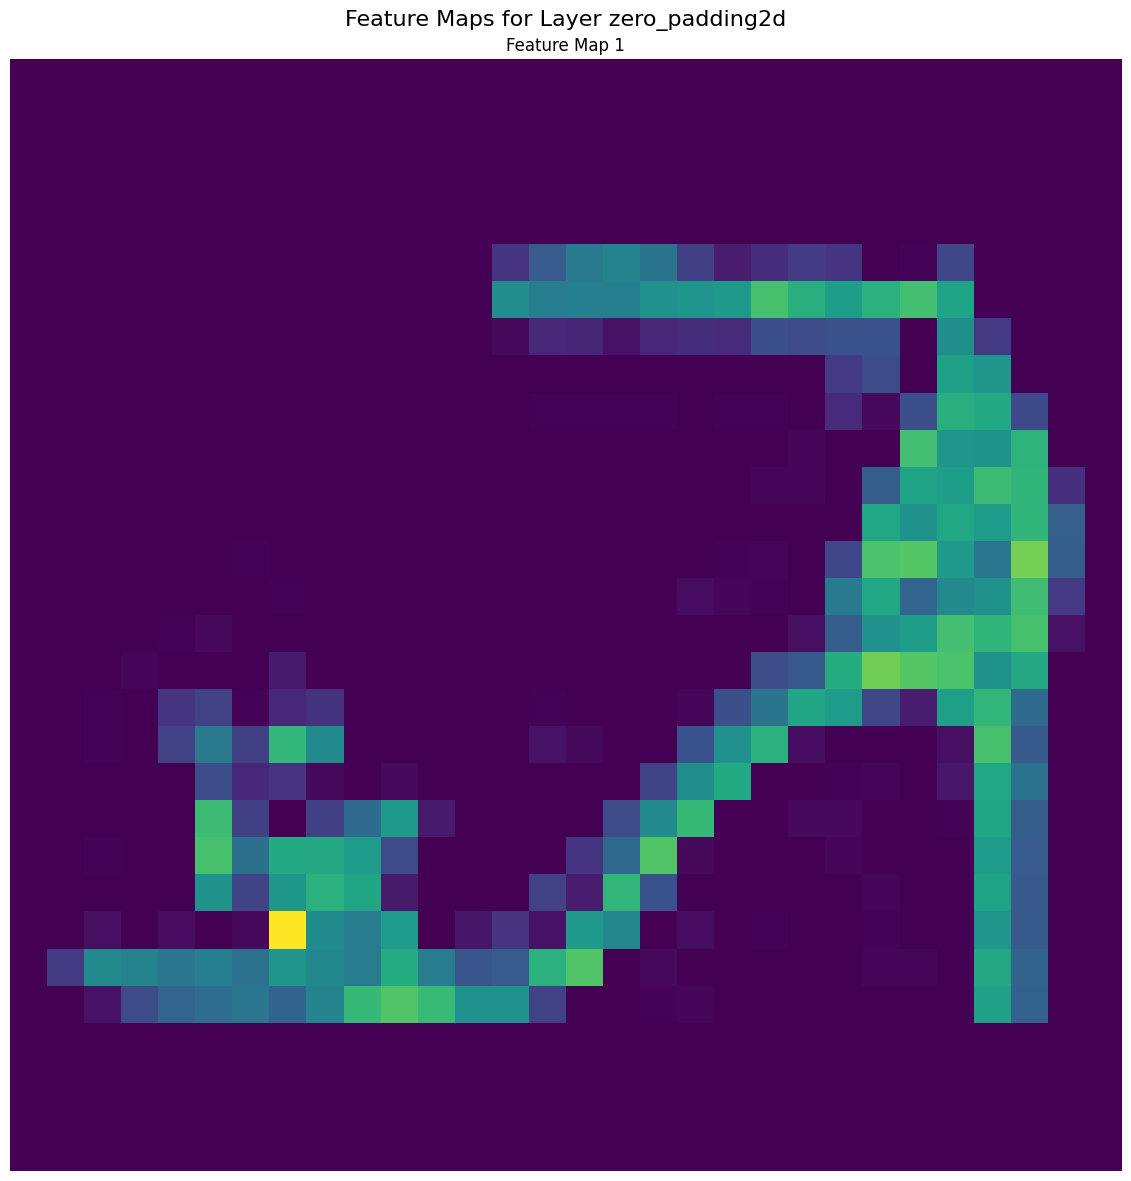

Activations for layer conv2d: Shape = (1, 28, 28, 32)


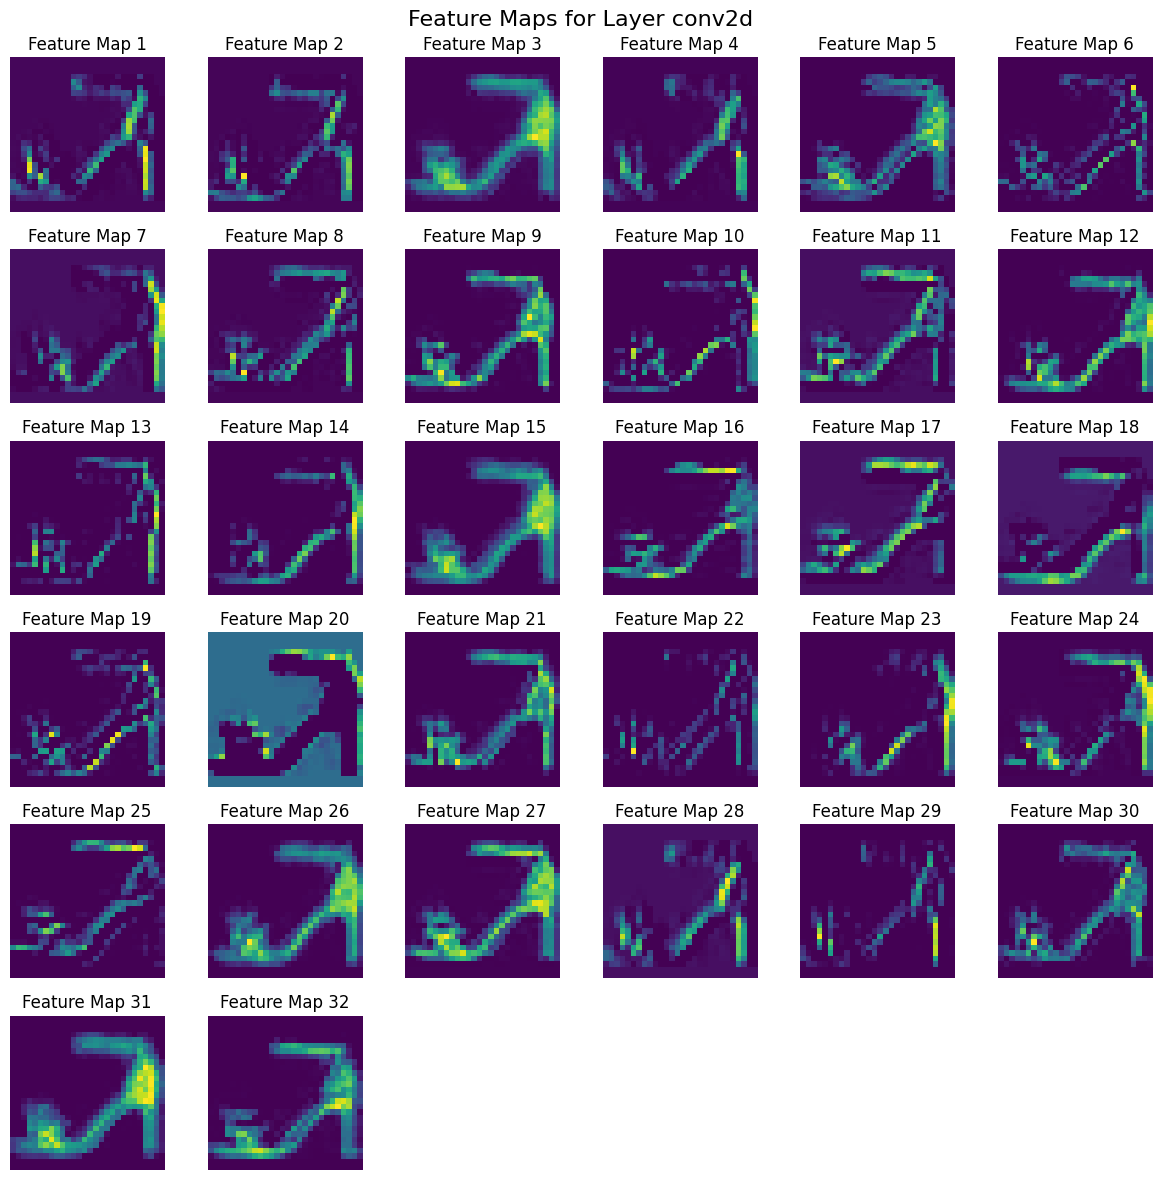

Activations for layer dropout: Shape = (1, 28, 28, 32)


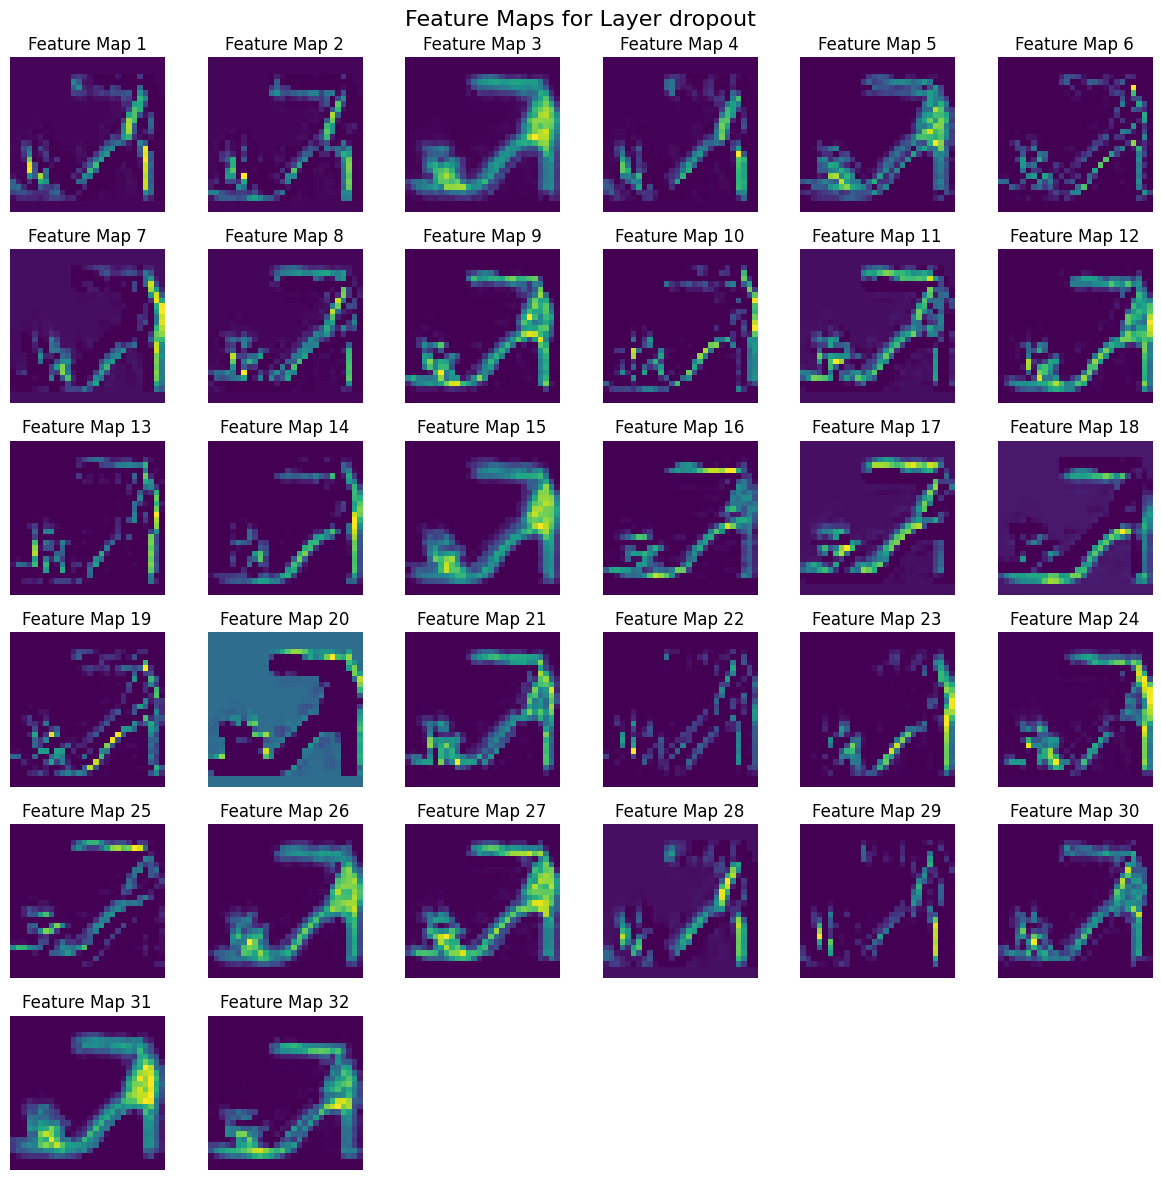

Activations for layer max_pooling2d: Shape = (1, 14, 14, 32)


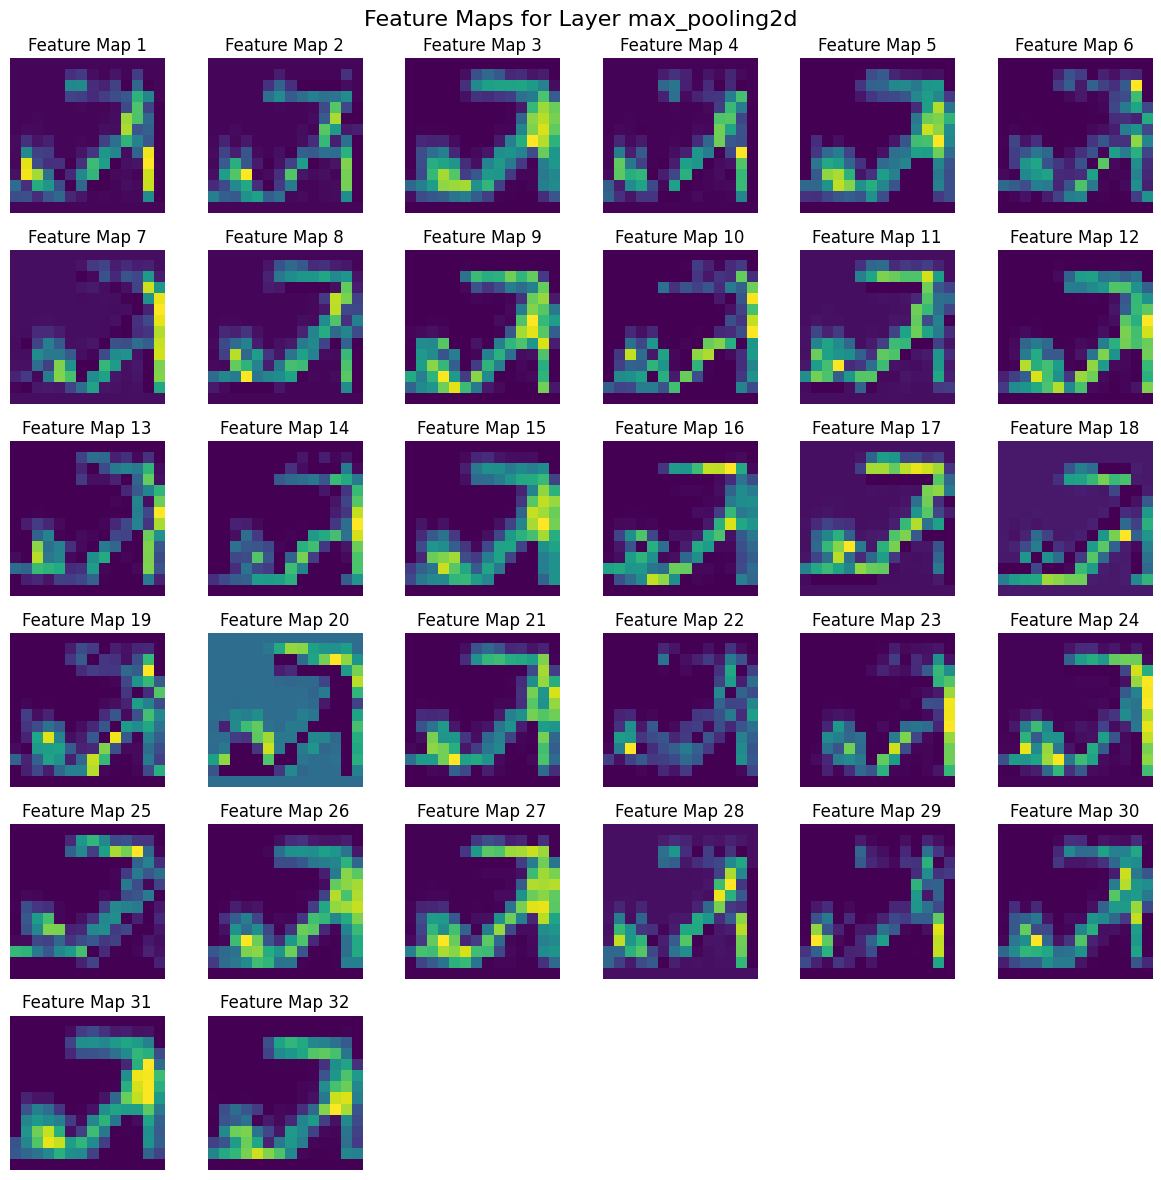

Activations for layer zero_padding2d_1: Shape = (1, 16, 16, 32)


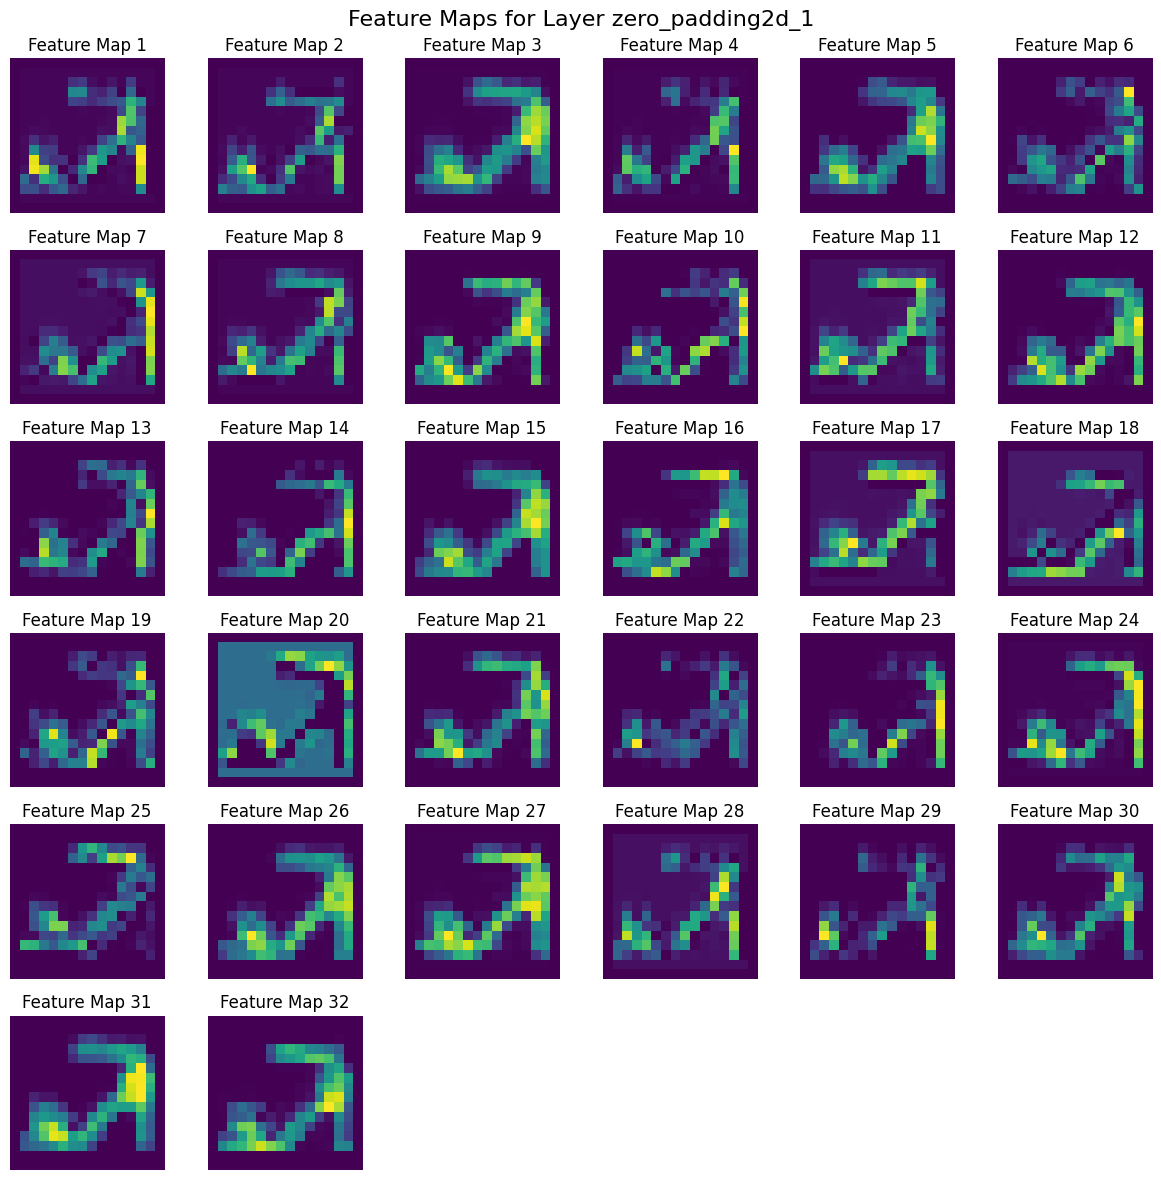

Activations for layer conv2d_1: Shape = (1, 14, 14, 64)


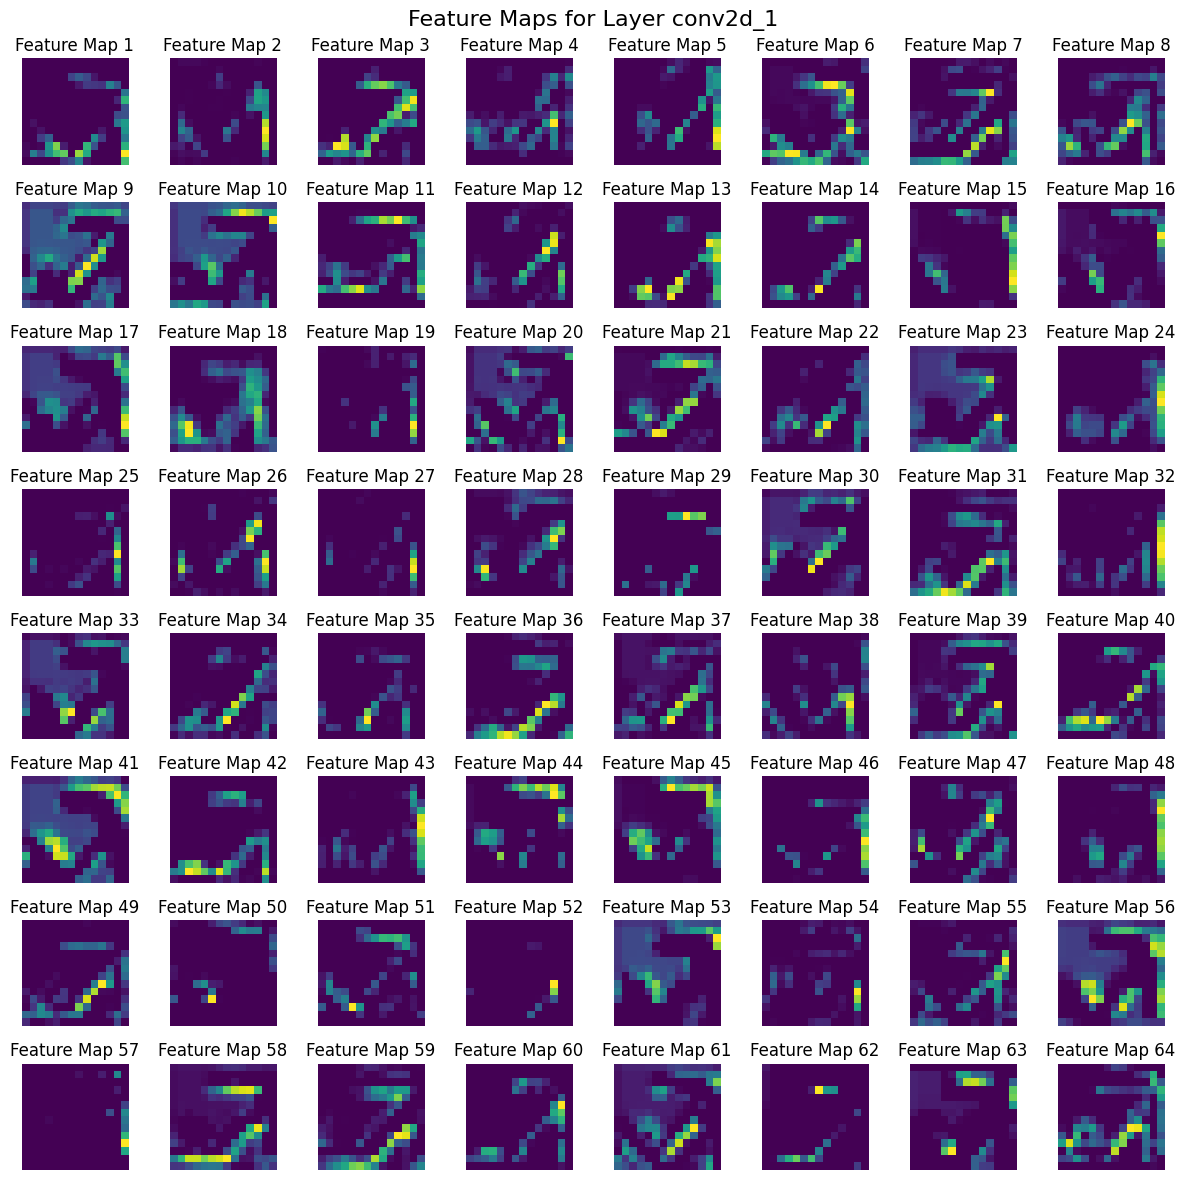

Activations for layer dropout_1: Shape = (1, 14, 14, 64)


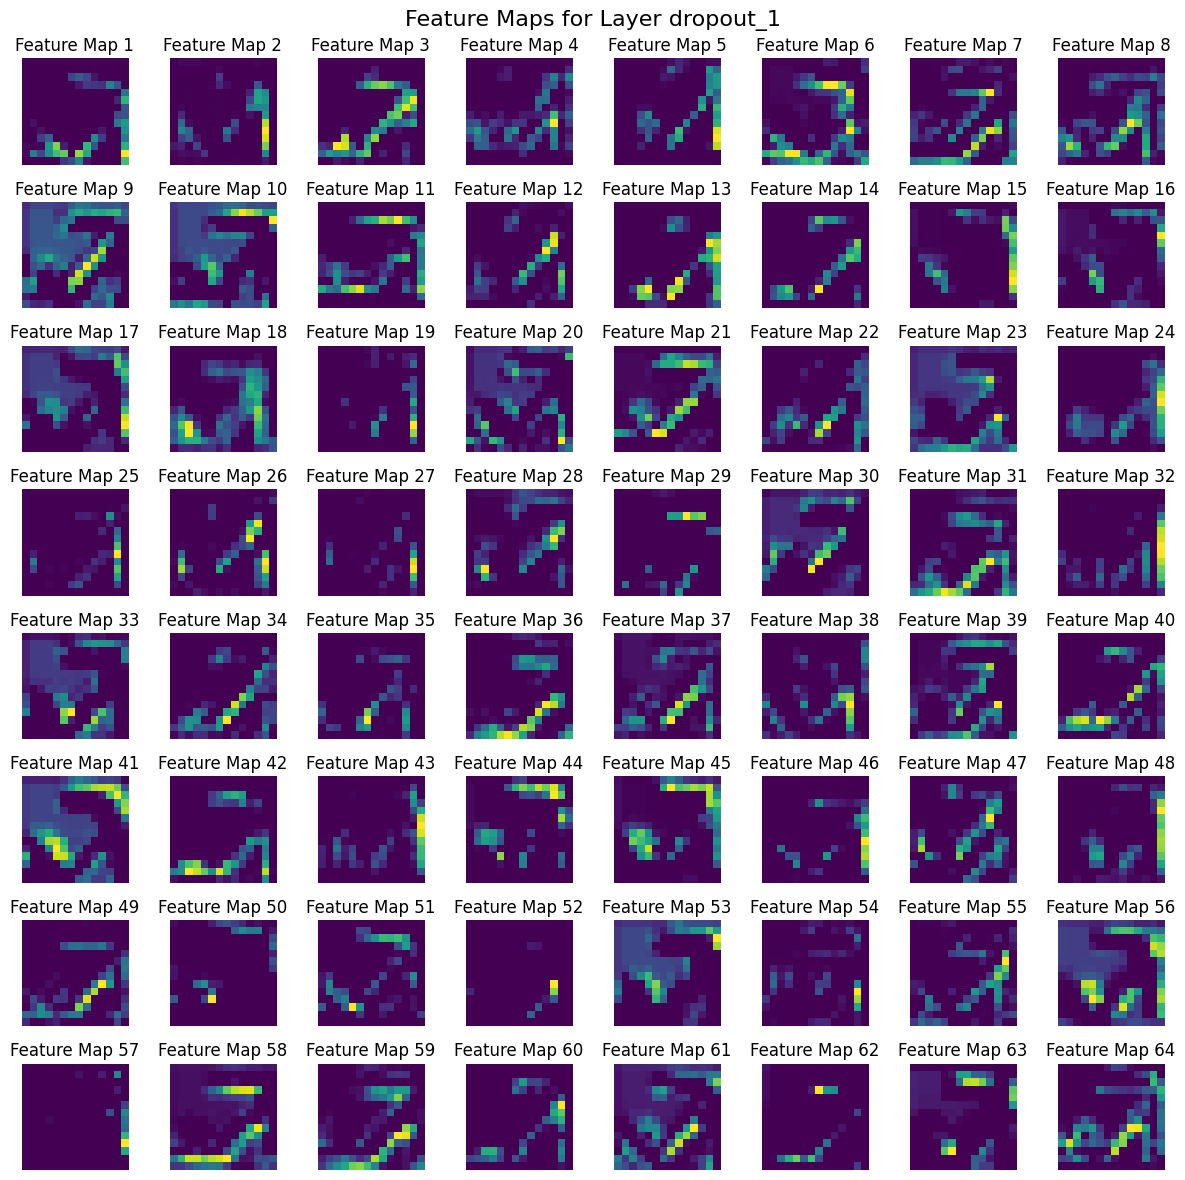

Activations for layer max_pooling2d_1: Shape = (1, 7, 7, 64)


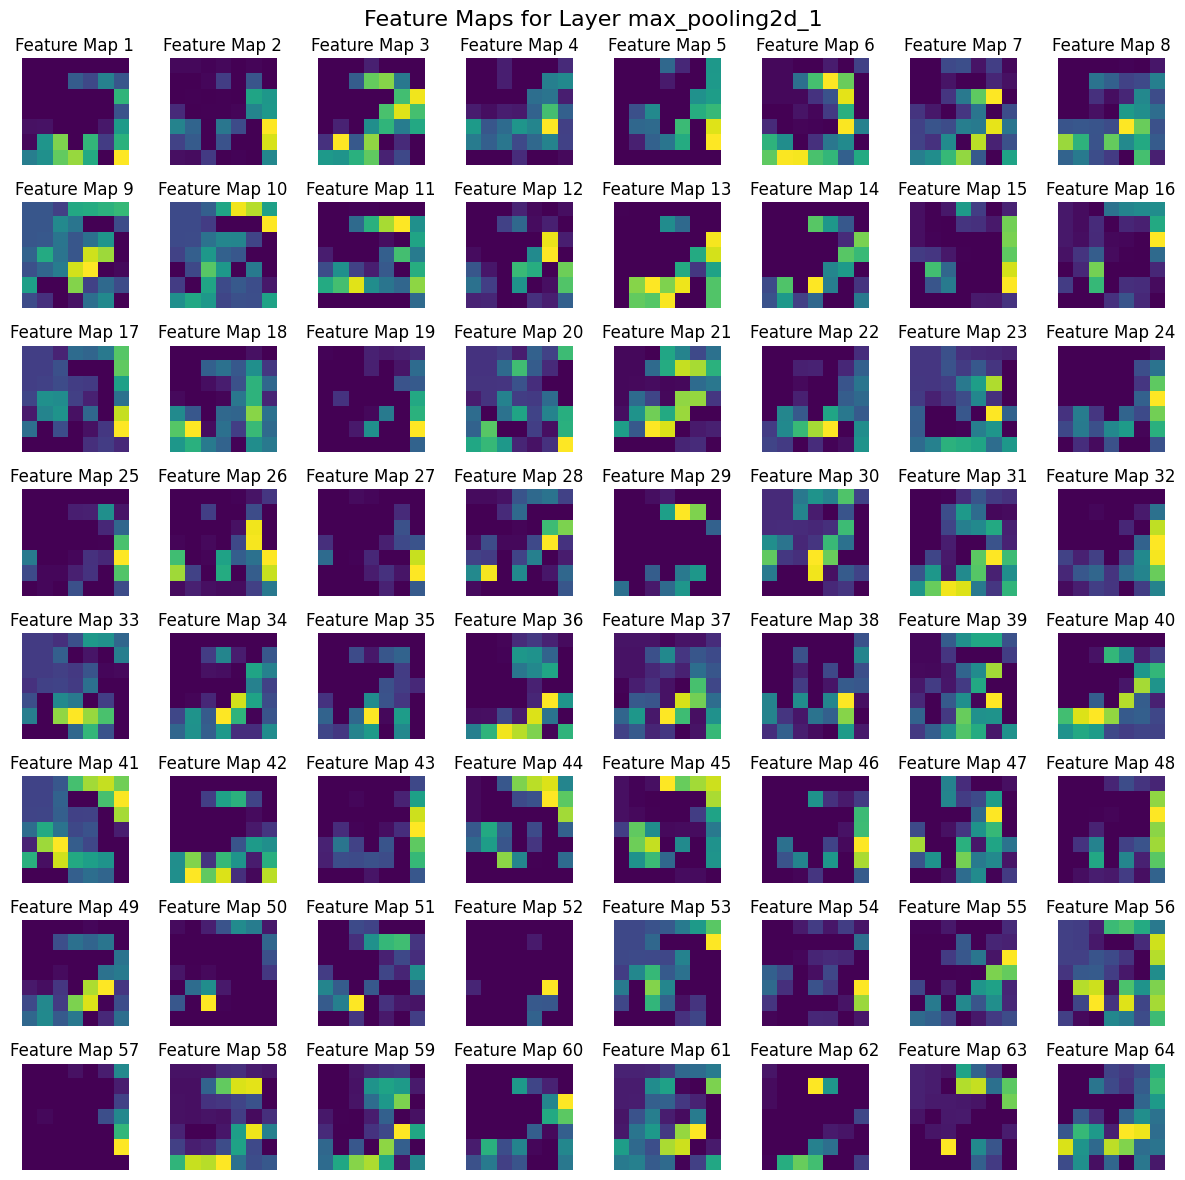

Activations for layer flatten: Shape = (1, 3136)


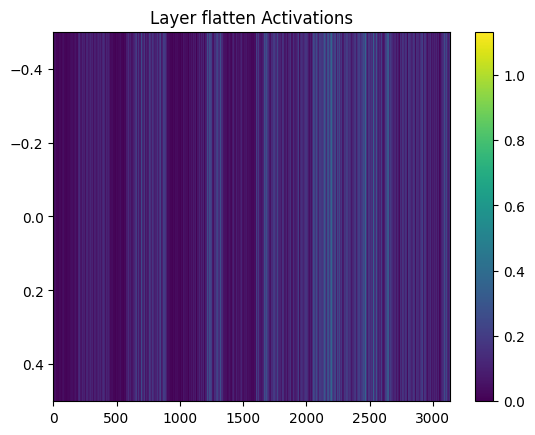

Activations for layer dense: Shape = (1, 128)


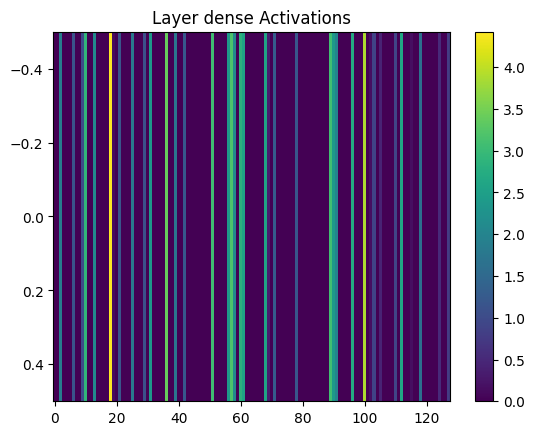

Activations for layer dropout_2: Shape = (1, 128)


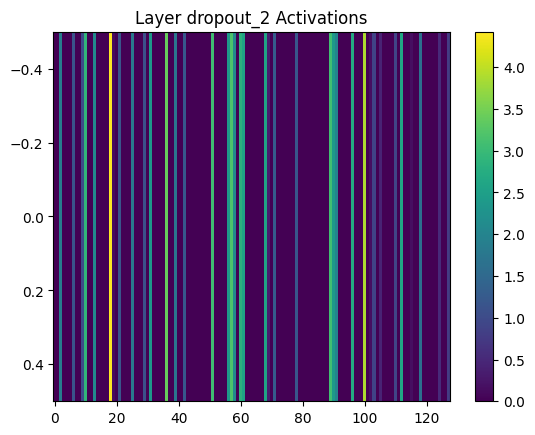

Activations for layer dense_1: Shape = (1, 10)


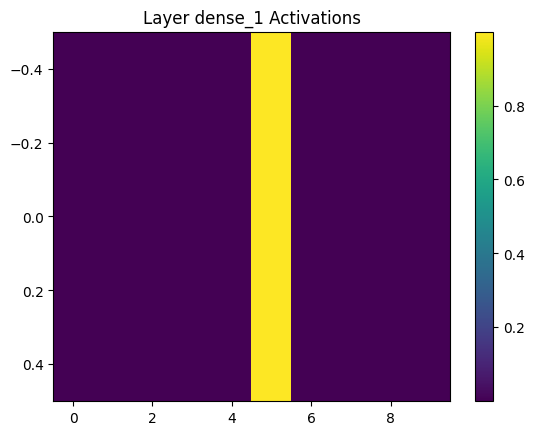

In [ ]:
feature_map_visualization(activations)

In [ ]:
# MohammadMahan HamediNik